In [1]:
import utils
import cleaning
import pandas as pd
import seaborn as sns

In [2]:
df = utils.read_csv(years=["2014", "2015", "2016", "2017", "2018"])

In [3]:
df[["Stock", "Sector", "Class"]] = df[["Stock", "Sector", "Class"]].astype("category")

In [4]:
df.shape

(22077, 226)

---
## NaN-Values

Remove features with a huge amount of NaN entries.

In [5]:
from IPython.core.display import display

data_info = pd.set_option('display.max_columns', None)
data_info=pd.DataFrame( df.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame( df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(df.isnull().sum()/ df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,Stock,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share)

In [6]:
nas_by_feature = df.isnull().sum(axis=0)
features_to_drop = nas_by_feature[nas_by_feature>3311]
features_to_drop.sort_values(inplace=True)
features_to_drop

companyEquityMultiplier                        3335
Net Cash/Marketcap                             3356
priceSalesRatio                                3357
priceFairValue                                 3574
capitalExpenditureCoverageRatios               3649
3Y Dividend per Share Growth (per Share)       3813
Weighted Average Shares Diluted Growth         3922
3Y Operating CF Growth (per Share)             4433
3Y Revenue Growth (per Share)                  4466
3Y Net Income Growth (per Share)               4466
3Y Shareholders Equity Growth (per Share)      4643
Payables Turnover                              4911
payablesTurnover                               4911
PTB ratio                                      4977
PB ratio                                       4977
Graham Number                                  4983
priceBookValueRatio                            4993
priceToBookRatio                               4993
Enterprise Value                               5040
EV to Free c

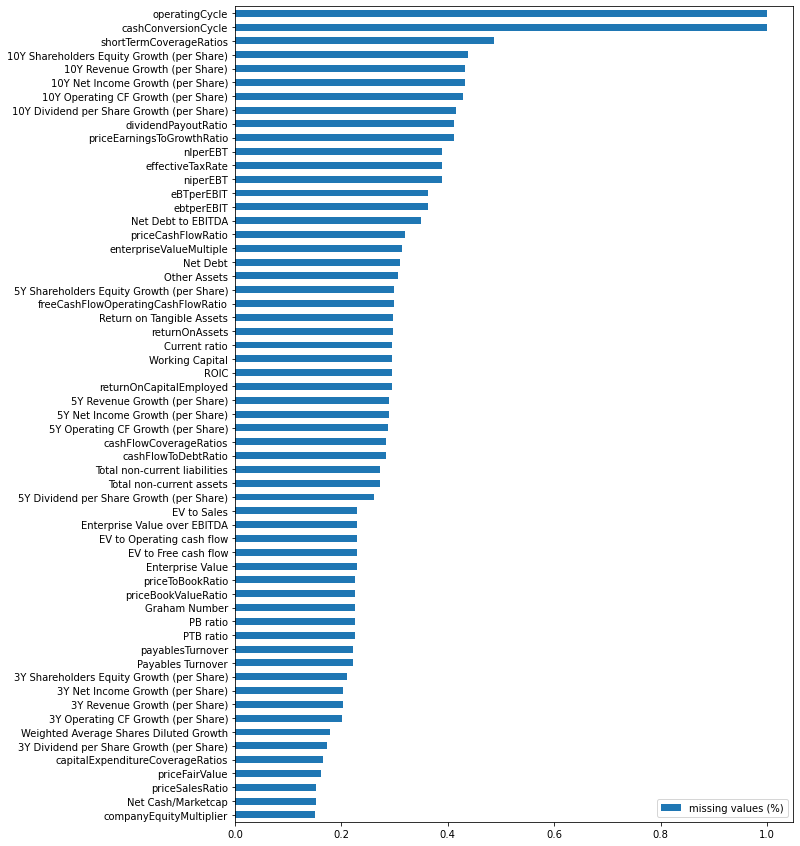

In [7]:
import matplotlib.pyplot as plt

miss = pd.DataFrame({'missing values (%)': features_to_drop.values/22077}, index=features_to_drop.index)
ax = miss.plot.barh(y='missing values (%)', figsize=(10,15))

In [8]:
df.drop(columns=miss.index, inplace=True)

In [9]:
df.shape

(22077, 167)

---
## Highly correlated features

Remove features which are highly correlated among eachother.

In [10]:
df = cleaning.remove_highly_correlated_features(df, bound=0.95)
df.shape

Removing features with a correlation of 0.95 or greater.


KeyError: ('Total debt', 'Stock')

In [ ]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corrMatrix, cmap="icefire", ax=ax)
plt.show()

```operatingProfitMargin``` has only a single value. We remove it therefore.

In [ ]:
df["operatingProfitMargin"].describe()

In [ ]:
df.drop(columns=["operatingProfitMargin"], inplace=True)

In [ ]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corrMatrix, cmap="icefire", ax=ax)
plt.show()

In [ ]:
df.columns